In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil

import wfdb
from wfdb import processing


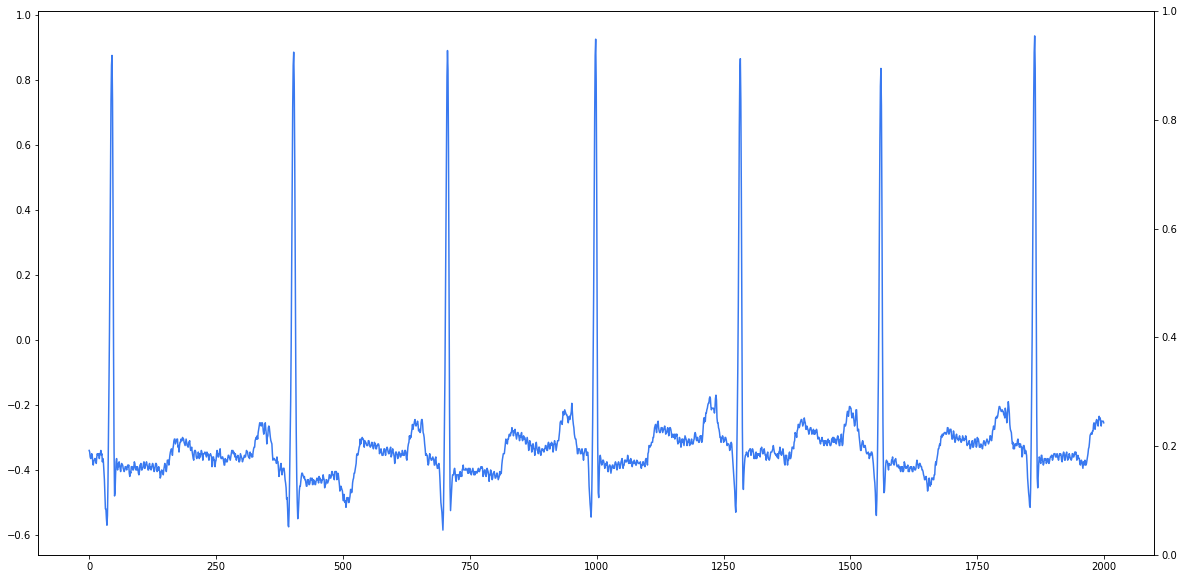

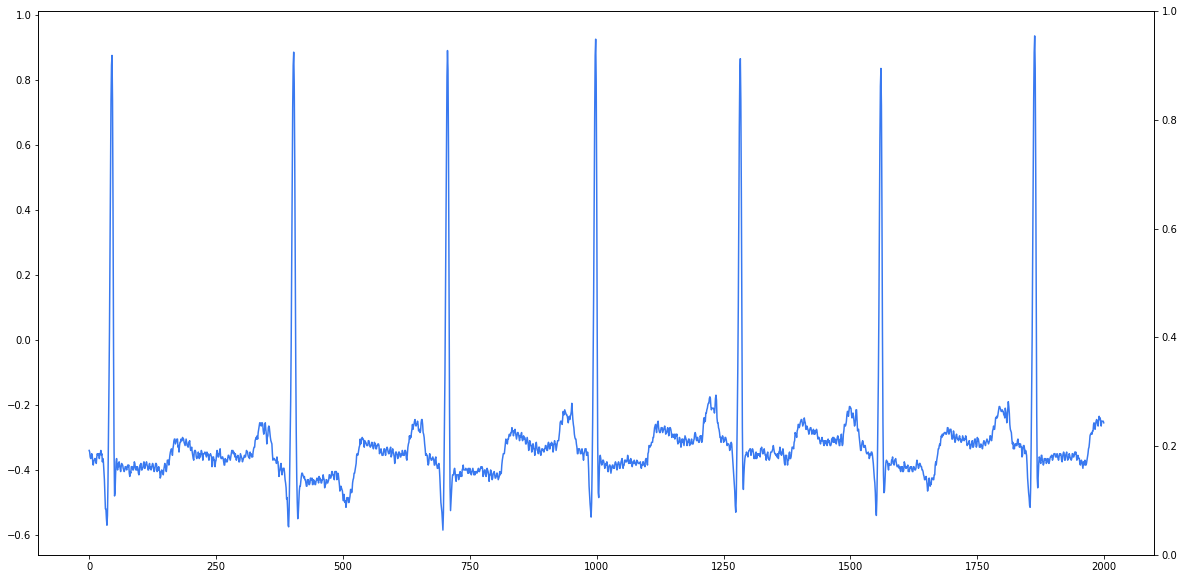

In [12]:
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    hrs = processing.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
#     ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)
#     ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

#     ax_left.set_title(title)

#     ax_left.set_xlabel('Time (ms)')
#     ax_left.set_ylabel('ECG (mV)', color='#3979f0')
#     ax_right.set_ylabel('Heart rate (bpm)', color='m')
#     ax_left.tick_params('y', colors='#3979f0')
#     ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()


record = wfdb.rdrecord('sampledata/100', sampfrom=2000, sampto=4000, channels=[0])

qrs_inds = processing.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
        title="GQRS peak detection on record 100")
    
min_bpm = 20
max_bpm = 230

search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.correct_peaks(record.p_signal[:,0], peak_inds=qrs_inds,
                                               search_radius=search_radius, smooth_window_size=150)


# print('Corrected gqrs detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")

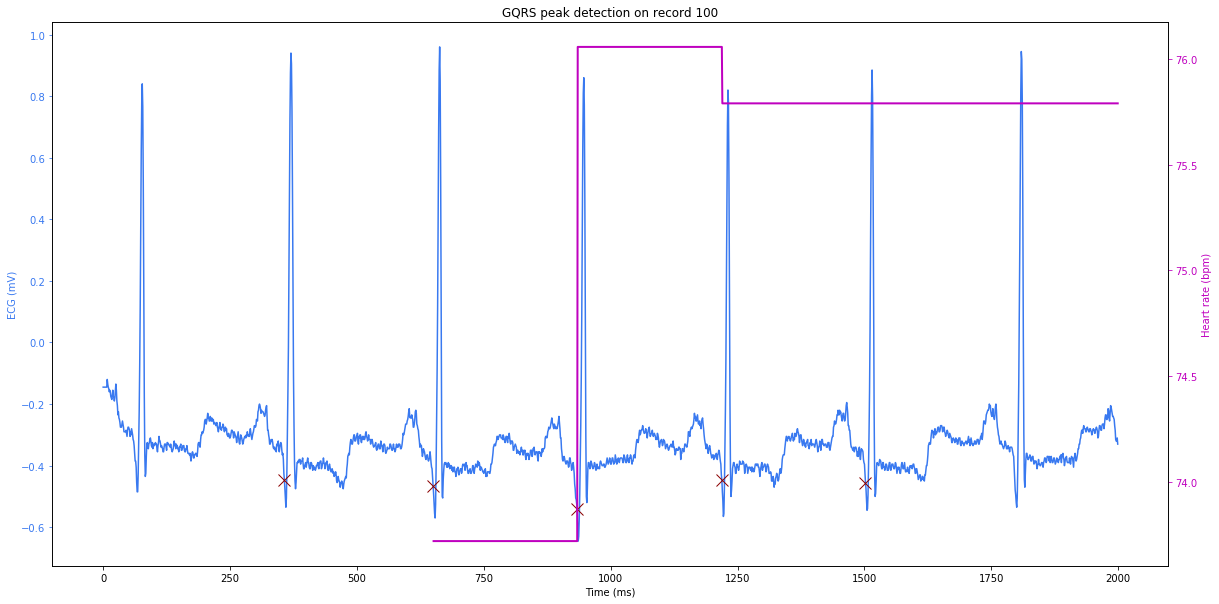

Corrected gqrs detected peak indices: [370, 663, 947, 1231, 1515]


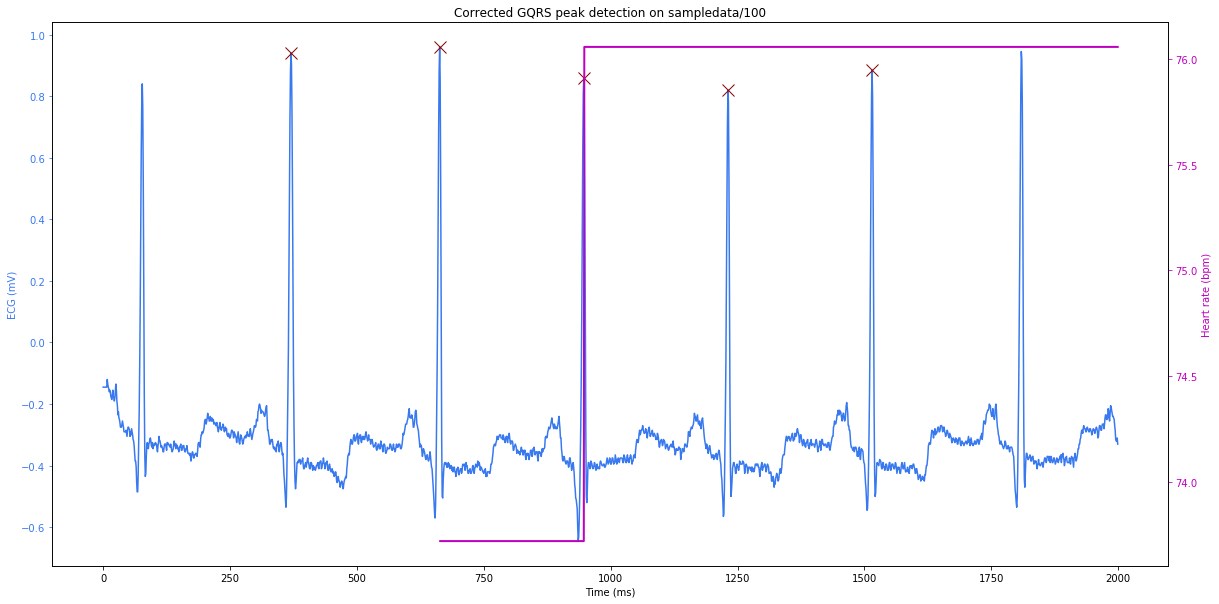

In [2]:
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    hrs = processing.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()


record = wfdb.rdrecord('sampledata/100', sampfrom=0, sampto=2000, channels=[0])

qrs_inds = processing.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
        title="GQRS peak detection on record 100")
    
min_bpm = 20
max_bpm = 230

search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.correct_peaks(record.p_signal[:,0], peak_inds=qrs_inds,
                                               search_radius=search_radius, smooth_window_size=150)


print('Corrected gqrs detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")
    